In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import torch
import torchvision # for datasets
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transform

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
# torchvision.datasets.MNIST

# Day 1. Tensor Basics!

In [ ]:
a = torch.empty(1) # scalar value, value not initialized yet
a

tensor([-2.8021e+24])

In [5]:
a = torch.empty([2, 3])
a

tensor([[-1.3619e-11,  3.3906e-41,  0.0000e+00],
        [ 0.0000e+00,  4.4842e-44,  0.0000e+00]])

In [15]:
a = torch.empty([3,])
a

tensor([-5.7604e-19,  3.3906e-41,  0.0000e+00])

In [16]:
b = torch.rand([2, 2])
b

tensor([[0.5007, 0.1833],
        [0.3618, 0.1794]])

In [18]:
b = torch.ones(2, 2)
b

tensor([[1., 1.],
        [1., 1.]])

In [22]:
c = torch.zeros([2, 3], dtype=torch.int)
c.dtype

torch.int32

In [29]:
arr = [2, 3, 1, 45]
a = torch.tensor(arr)
a

tensor([ 2,  3,  1, 45])

In [30]:
x = torch.rand([2, 2])
y = torch.rand([2, 2])
x, y

(tensor([[0.2318, 0.7052],
         [0.0594, 0.2370]]),
 tensor([[0.5762, 0.2044],
         [0.7939, 0.4198]]))

In [ ]:
x + y
torch.add(x, y)  # torch.add_(x, y)

x - y
torch.sub(x, y)  # torch.sub_(x, y)

x / y
torch.div(x, y)  # torch.div_(x, y)

x * y
torch.mul(x, y)  # torch.mul_(x, y)

tensor([[0.8080, 0.9097],
        [0.8533, 0.6567]])

In [32]:
x - y + y

tensor([[0.2318, 0.7052],
        [0.0594, 0.2370]])

In [33]:
x + y / 2

tensor([[0.5199, 0.8074],
        [0.4564, 0.4469]])

In [35]:
x[0]

tensor([0.2318, 0.7052])

In [37]:
torch.dot(x[0], y[0])

tensor(0.2777)

In [40]:
x.add(2)

tensor([[4.2318, 4.7052],
        [4.0594, 4.2370]])

In [39]:
x.add_(2) #inplace
x

tensor([[2.2318, 2.7052],
        [2.0594, 2.2370]])

In [42]:
x = torch.rand([5, 3])
x

tensor([[0.8963, 0.7810, 0.8243],
        [0.8946, 0.7171, 0.3172],
        [0.4631, 0.7369, 0.5892],
        [0.7482, 0.0369, 0.3502],
        [0.7531, 0.4460, 0.5883]])

In [44]:
x[1, :]

tensor([0.8946, 0.7171, 0.3172])

In [46]:
x[1, 1].item()

0.717079758644104

In [ ]:
# Reshaping

x = torch.rand([4, 4])
x

tensor([[0.9119, 0.7043, 0.9700, 0.1690],
        [0.6645, 0.0896, 0.1956, 0.5659],
        [0.0253, 0.2843, 0.8194, 0.0467],
        [0.9689, 0.4883, 0.2676, 0.0160]])

In [ ]:
x.view([8, -1])
# 8 by 2

tensor([[0.9119, 0.7043],
        [0.9700, 0.1690],
        [0.6645, 0.0896],
        [0.1956, 0.5659],
        [0.0253, 0.2843],
        [0.8194, 0.0467],
        [0.9689, 0.4883],
        [0.2676, 0.0160]])

In [ ]:
x.view([-1, 8])
# 2 by 8

tensor([[0.9119, 0.7043, 0.9700, 0.1690, 0.6645, 0.0896, 0.1956, 0.5659],
        [0.0253, 0.2843, 0.8194, 0.0467, 0.9689, 0.4883, 0.2676, 0.0160]])

In [53]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [ ]:
a.numpy()

array([1., 1., 1., 1., 1.], dtype=float32)

In [ ]:
a

tensor([1., 1., 1., 1., 1.])

In [57]:
b = np.random.randint(2, 10, 10)
b

array([2, 7, 7, 4, 4, 6, 8, 4, 7, 9])

In [66]:
#b = torch.from_numpy(b)
b = b.to(torch.float16)

In [ ]:
b

# We can use tensors only on CPU, and if we moved tensor into GPU we can't come it back

tensor([2., 7., 7., 4., 4., 6., 8., 4., 7., 9.], dtype=torch.float16)

# Autograd. Calculating gradieents

In [69]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.0930, -1.9463, -0.3726], requires_grad=True)

In [70]:
y = x + 2
y

tensor([0.9070, 0.0537, 1.6274], grad_fn=<AddBackward0>)

In [71]:
z = y * y * 2
z

tensor([1.6453, 0.0058, 5.2969], grad_fn=<MulBackward0>)

In [72]:
z = z.mean()
z

tensor(2.3160, grad_fn=<MeanBackward0>)

In [73]:
z.backward() # dz / dx

In [74]:
x.grad

tensor([1.2093, 0.0715, 2.1699])

In [81]:
x = torch.randn(3, requires_grad=True)
print(x)

y = x + 2
print(y)
z = y * y * 2
# z = z.mean()
print(z)

v = torch.tensor([.1, 1., .001], dtype=torch.float32)

z.backward(v)
# print(x.grad)


# clearing grads

x.requires_grad_(False)
print(x)
# x.detach() # create a new tensor without grads
# with torch.no_grad():

tensor([-0.8242, -0.3202, -0.9756], requires_grad=True)
tensor([1.1758, 1.6798, 1.0244], grad_fn=<AddBackward0>)
tensor([2.7652, 5.6434, 2.0986], grad_fn=<MulBackward0>)
tensor([-0.8242, -0.3202, -0.9756])


In [86]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
    model_output = (weights * 3).sum()
    
    model_output.backward()
    print(weights.grad)
    
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


# Backprop

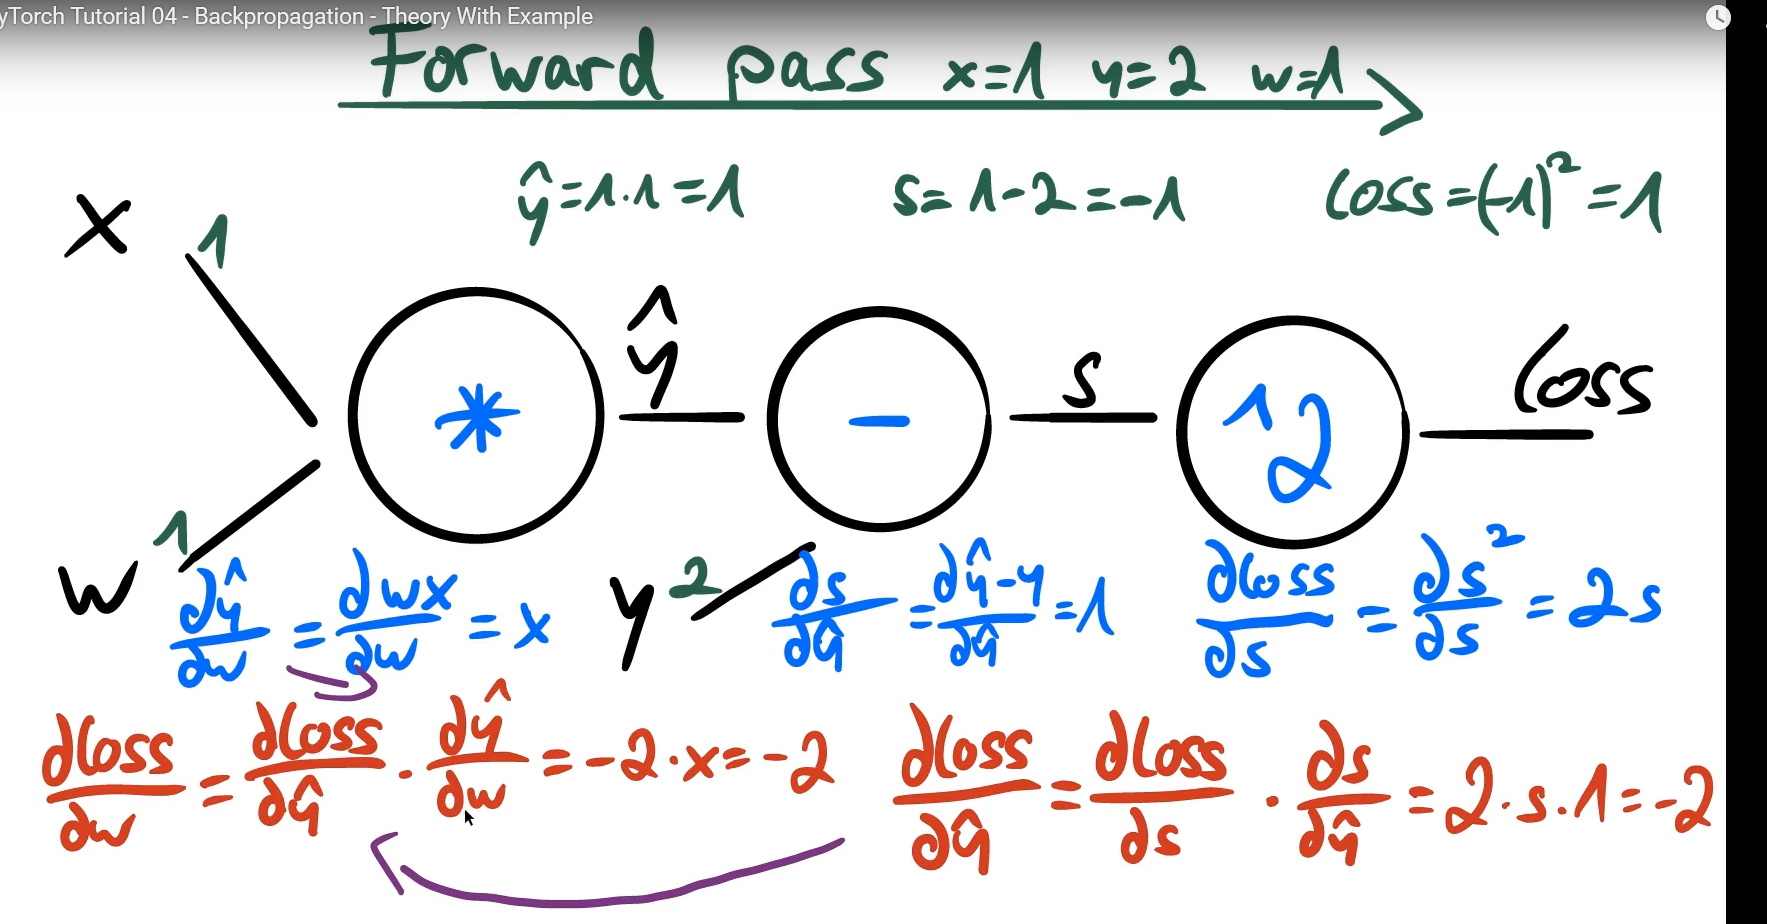

In [ ]:
# x = 1.0, y = 2.0, w = 1.0

x = torch.tensor(1.0)
y = torch.tensor(2.)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss

y_hat = w * x     # 1
loss = (y_hat - y) ** 2    # (1 - 2) ** 2 = 1

# loss = 1
print(loss)

# backward pass (pytorch will automaticly compute grad for us)
loss.backward()     # whole gradient computation
print(w.grad) # dloss / dw


### update weights 
### next forward pass and backwards

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# Gradient Descent with Autograd and Backpropagation

In [22]:
# Step 1. Manually
# f = w * x | w = 2
# f = 2 * x

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# model prediction

# forward pass
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 15

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # gradients
    dw = gradient(X, y, y_pred)
    
    # update our date
    w -= learning_rate * dw
    
    
    if epoch % 1 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 1.200, loss=30.00000000
epoch 2: w = 1.680, loss=4.80000067
epoch 3: w = 1.872, loss=0.76800019
epoch 4: w = 1.949, loss=0.12288000
epoch 5: w = 1.980, loss=0.01966083
epoch 6: w = 1.992, loss=0.00314574
epoch 7: w = 1.997, loss=0.00050332
epoch 8: w = 1.999, loss=0.00008053
epoch 9: w = 1.999, loss=0.00001288
epoch 10: w = 2.000, loss=0.00000206
epoch 11: w = 2.000, loss=0.00000033
epoch 12: w = 2.000, loss=0.00000005
epoch 13: w = 2.000, loss=0.00000001
epoch 14: w = 2.000, loss=0.00000000
epoch 15: w = 2.000, loss=0.00000000
Pred after training: f(5) = 10.000


In [25]:
# Step 2. Compute gradient automatically
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction

# forward pass
def forward(x):
    return w * x

# loss = MSE
def loss(y, y_pred):
    return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

def gradient(x, y, y_pred):
    return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 1000

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    with torch.no_grad():
        w -= learning_rate * w.grad  
    
    # set grad to zero
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
epoch 101: w = 2.000, loss=0.00000000
epoch 111: w = 2.000, loss=0.00000000
epoch 121: w = 2.000, loss=0.00000000
epoch 131: w = 2.000, loss=0.00000000
epoch 141: w = 2.000, loss=0.00000000
epoch 151: w = 2.000, loss=0.00000000
epoch 161: w = 2.000, loss=0.00000000
epoch 171: w = 2.000, loss=0.00000000
epoch 181: w = 2.000, loss=0.00000000
epoch 191: w = 2.000, loss=0.00000000
epoch 201: w = 2.000, loss=0.00000000
epoch 211: w = 2.000, loss=0.00000000
epoch 221: w = 2.000, loss=0.00000000
epoch 231: w = 2.000, loss=0.00000000
epoch 241: w = 2.000, loss=0.00000000
epoch 251: w = 2.000, los

## Model creating pipeline 

* 1) Design a model (input, output size, forward pass)
* 2) Design loss and optimizer
* 3) Training loop
*   - forward pass: compute prediction
*   - backward pass: gradients
*   - update weights 

In [ ]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 







# Step 3. Compute gradient and loss automatically, also use optimizer
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction

# forward pass
def forward(x):
    return w * x

# Look for loss code
# loss = MSE
# def loss(y, y_pred):
#     return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {forward(5):.3f}')

#Training 
learning_rate = .01
n_iters = 100

# loss here now
loss = nn.MSELoss()
optimizer = torch.optim.SGD([w], lr=learning_rate)

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = forward(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    # with torch.no_grad():
    #     w -= learning_rate * w.grad  
    optimizer.step()
    
    # set grad to zero
    # w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.000
epoch 1: w = 0.300, loss=30.00000000
epoch 11: w = 1.665, loss=1.16278565
epoch 21: w = 1.934, loss=0.04506890
epoch 31: w = 1.987, loss=0.00174685
epoch 41: w = 1.997, loss=0.00006770
epoch 51: w = 1.999, loss=0.00000262
epoch 61: w = 2.000, loss=0.00000010
epoch 71: w = 2.000, loss=0.00000000
epoch 81: w = 2.000, loss=0.00000000
epoch 91: w = 2.000, loss=0.00000000
Pred after training: f(5) = 10.000


In [56]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 







# Step 4. Compute full automatically
# f = w * x | w = 2
# f = 2 * x

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)
model = LinearRegression(input_size, output_size)

x_test = torch.tensor([5], dtype=torch.float32)

# w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# # model prediction

# # forward pass
# def forward(x):
#     return w * x

# Look for loss code
# loss = MSE
# def loss(y, y_pred):
#     return ((y_pred - y) ** 2).mean()


# gradient
# MSE = 1/n * (w*x - y)^2
# dJ/dw = 1/n 2*(w*x - y)

# def gradient(x, y, y_pred):
#     return np.dot(2*x, y_pred-y).mean()

print(f'Pred before training: f(5) = {model(x_test).item():.3f}')

#Training 
learning_rate = .01
n_iters = 100

# loss here now
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    
    #prediction = forward_pwass
    y_pred = model(X)
    
    # loss
    l = loss(y, y_pred)

    # # gradients
    # dw = gradient(X, y, y_pred)
    l.backward() # dl/dw
    
    # # update our date
    # w -= learning_rate * dw
    
    # update weights
    # with torch.no_grad():
    #     w -= learning_rate * w.grad  
    optimizer.step()
    
    # set grad to zero
    # w.grad.zero_()
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {model(x_test).item():.3f}')

4 1
Pred before training: f(5) = -1.131
epoch 1: w = -0.051, loss=34.10893631
epoch 11: w = 1.294, loss=1.16957831
epoch 21: w = 1.521, loss=0.30064797
epoch 31: w = 1.569, loss=0.26242858
epoch 41: w = 1.587, loss=0.24661787
epoch 51: w = 1.600, loss=0.23224939
epoch 61: w = 1.612, loss=0.21873096
epoch 71: w = 1.623, loss=0.20599976
epoch 81: w = 1.635, loss=0.19400947
epoch 91: w = 1.645, loss=0.18271710
Pred after training: f(5) = 9.289


In [55]:
class LinearRegression(nn.Module):
    
    def __init__(self, input_dim, output_dim, *args, **kwargs):
        super(LinearRegression, self).__init__(*args, **kwargs)
        
        # define layers
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

In [34]:
_x = torch.sigmoid(torch.tensor(np.dot([1, 2, 3, 4], 0.0))).numpy()
_x
# torch.tensor(np.dot([1, 2, 3, 4], 0.0))

array([0.5, 0.5, 0.5, 0.5])

In [ ]:
np.clip()

In [48]:
X = np.array([1, 2, 3, 4])
y = np.array([0, 0, 1, 1])

w = 0.0

def forward(x):
    return 1 / (1 + np.exp(-x * w))

def loss(y, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1-epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# dL/dw
def gradient(x, y, y_pred):
    return np.dot(x, y_pred - y).mean()


learning_rate = .1
n_iters = 100

print(f'Pred before training: f(5) = {forward(5):.3f}')

for epoch in range(n_iters):
    
    y_pred = forward(X)
    l = loss(y, y_pred)
    dw = gradient(X, y, y_pred)
    w -= learning_rate * dw
    
    if epoch % 10 == 0:
        print(f'epoch {epoch+1}: w = {w:.3f}, loss={l:.8f}')    
        
print(f'Pred after training: f(5) = {forward(5):.3f}')

Pred before training: f(5) = 0.500
epoch 1: w = 0.200, loss=0.69314718
epoch 11: w = 0.288, loss=0.62395775
epoch 21: w = 0.288, loss=0.62395775
epoch 31: w = 0.288, loss=0.62395775
epoch 41: w = 0.288, loss=0.62395775
epoch 51: w = 0.288, loss=0.62395775
epoch 61: w = 0.288, loss=0.62395775
epoch 71: w = 0.288, loss=0.62395775
epoch 81: w = 0.288, loss=0.62395775
epoch 91: w = 0.288, loss=0.62395775
Pred after training: f(5) = 0.808


Pred before training: f(5) = 0.500
epoch 1: w = 0.050, loss = 0.69314718
epoch 11: w = 0.247, loss = 0.62574923
epoch 21: w = 0.280, loss = 0.62402282
epoch 31: w = 0.286, loss = 0.62396028
epoch 41: w = 0.287, loss = 0.62395785
epoch 51: w = 0.288, loss = 0.62395776
epoch 61: w = 0.288, loss = 0.62395775
epoch 71: w = 0.288, loss = 0.62395775
epoch 81: w = 0.288, loss = 0.62395775
epoch 91: w = 0.288, loss = 0.62395775
Pred after training: f(5) = 0.808


# Linear Regression

In [ ]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights 

In [1]:
from sklearn import datasets

In [38]:
# 0) prepare data

X_np, y_np = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)
X = torch.from_numpy(X_np.astype(np.float32))
y = torch.from_numpy(y_np.astype(np.float32))

y = y.view(-1, 1)
y   # y.reshape(-1, ), y.squeeze(), y.view(-1, ) 

tensor([[-5.5539e+01],
        [-1.0662e+01],
        [ 2.2757e+01],
        [ 1.0110e+02],
        [ 1.4434e+02],
        [ 3.3289e+01],
        [ 3.3015e+01],
        [-2.5887e+01],
        [-9.9639e+01],
        [ 2.3803e+01],
        [-4.5589e+01],
        [-8.3388e+00],
        [-9.5315e+01],
        [ 3.6407e+01],
        [-8.7293e+01],
        [ 6.7669e+01],
        [-1.3687e+01],
        [-5.5441e+01],
        [-6.5340e+01],
        [-5.4450e+01],
        [-2.8835e+01],
        [ 1.7884e+02],
        [ 6.5084e+01],
        [ 2.6668e+01],
        [-1.8546e+01],
        [-4.1499e+01],
        [ 8.5583e-01],
        [ 4.4562e+01],
        [ 1.1598e+02],
        [-6.4620e+01],
        [-2.5931e+01],
        [-6.0882e+01],
        [ 1.8720e+01],
        [ 7.5070e+01],
        [ 1.1720e+02],
        [-2.2698e+01],
        [-5.6363e+01],
        [ 1.8084e+02],
        [-1.9257e+02],
        [ 6.8503e+01],
        [ 1.6552e+02],
        [ 1.0500e+02],
        [-7.0434e+01],
        [-5

In [ ]:
# Always check the training data shape
X.shape, y.shape

(torch.Size([100, 1]), torch.Size([100, 1]))

In [34]:
# torch.from_numpy(y_np.astype(np.float32))
y_np

array([-5.55385928e+01, -1.06619847e+01,  2.27574081e+01,  1.01096129e+02,
        1.44337558e+02,  3.32888330e+01,  3.30152710e+01, -2.58869694e+01,
       -9.96391397e+01,  2.38030714e+01, -4.55886864e+01, -8.33875709e+00,
       -9.53154191e+01,  3.64072963e+01, -8.72926036e+01,  6.76693724e+01,
       -1.36866100e+01, -5.54414224e+01, -6.53402399e+01, -5.44497141e+01,
       -2.88351332e+01,  1.78835048e+02,  6.50839520e+01,  2.66683131e+01,
       -1.85459706e+01, -4.14990408e+01,  8.55827764e-01,  4.45616521e+01,
        1.15984811e+02, -6.46197993e+01, -2.59312718e+01, -6.08820426e+01,
        1.87195482e+01,  7.50696998e+01,  1.17203175e+02, -2.26982690e+01,
       -5.63625811e+01,  1.80837188e+02, -1.92574950e+02,  6.85032358e+01,
        1.65522025e+02,  1.05000391e+02, -7.04338757e+01, -5.87693362e+01,
       -4.15757142e+01,  7.32472269e+01,  4.09664082e+01,  8.04619460e+01,
       -2.87939943e+01,  3.42341054e+01, -4.17148764e+01,  1.43547375e+01,
        7.93363240e+01,  

In [26]:
n_samples, n_features = X.shape
n_samples, n_features

(100, 1)

In [27]:
# 1) model
input_size = n_features
output_size = 1

model = nn.Linear(input_size, output_size)


In [29]:
# 2) loss and optimizer

learning_rate = .01
critirion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch 10, loss = 4382.560547
epoch 20, loss = 3270.795898
epoch 30, loss = 2466.069824
epoch 40, loss = 1882.981079
epoch 50, loss = 1460.078857
epoch 60, loss = 1153.085205
epoch 70, loss = 930.048645
epoch 80, loss = 767.886108
epoch 90, loss = 649.901428
epoch 100, loss = 564.004089


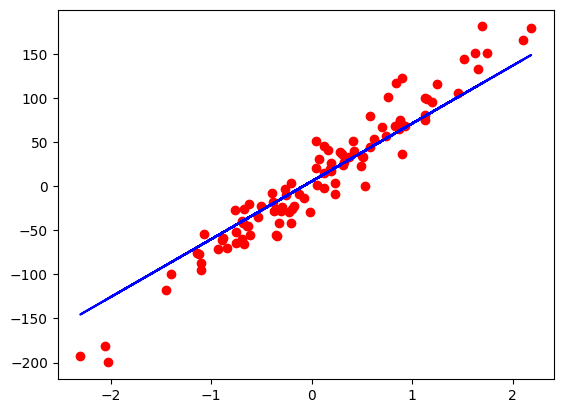

In [30]:
num_epochs = 100
for epoch in range(num_epochs):
    
    # forward pass and loss
    y_pred = model(X)
    l = critirion(y_pred, y)
    
    
    
    # backward pass
    l.backward()
    
    # weight update 
    optimizer.step()
    
    
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}, loss = {l.item():4f}')
        
# plot
predicted = model(X).detach().numpy()
plt.plot(X_np, y_np, 'ro')
plt.plot(X_np, predicted, 'b')
plt.show()    

In [ ]:
# 1) Design a model (input, output size, forward pass)
# 2) Design loss and optimizer
# 3) Training loop
#   - forward pass: compute prediction
#   - backward pass: gradients
#   - update weights

## LogisticRegression, breast cancer dataset

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [22]:
# prepare the data

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

In [23]:
X.shape, y.shape    # numpy.ndarray

((569, 30), (569,))

In [ ]:
#y = y.reshape(-1, 1)

(569, 1)

In [24]:
n_samples, n_features = X.shape
n_samples, n_features

(569, 30)

In [25]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1234)

In [26]:
# scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [27]:
# convert to tensors

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(-1, 1)
y_test = y_test.reshape(-1, 1)

In [32]:
# 1) model 
# f = wx + b, sigmoid

class LogisticRegression(nn.Module):
    
    def __init__(self, n_input_features, *args, **kwargs):
        super(LogisticRegression, self).__init__(*args, **kwargs)
        
        # defining layer, in this case I have only one layer
        
        self.linear = nn.Linear(n_input_features, 1)
    
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred
        

In [33]:
model = LogisticRegression(n_features)

In [34]:
# 2) loss and optimizer and lr

learning_rate = 0.01

critirion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [35]:
# 3) training loop

num_epochs = 100

for epoch in range(num_epochs):
    # forward pass and loss
    
    y_pred = model(X_train)
    l = critirion(y_pred, y_train)
    
    # backward pass 
    l.backward()
    
    # update weights and set grads to zero
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}, loss = {l.item():.4f}')
        
# plot
# predicted = model(X).detach().numpy()
# plt.plot(X_np, y_np, 'ro')
# plt.plot(X_np, predicted, 'b')
# plt.show()    
    

epoch 10, loss = 0.5589
epoch 20, loss = 0.4622
epoch 30, loss = 0.4006
epoch 40, loss = 0.3576
epoch 50, loss = 0.3256
epoch 60, loss = 0.3007
epoch 70, loss = 0.2806
epoch 80, loss = 0.2641
epoch 90, loss = 0.2502
epoch 100, loss = 0.2383


In [36]:
# evaluation

with torch.no_grad():
    y_pred = model(X_test)
    y_pred_csl = y_pred.round()
    acc = y_pred_csl.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy = {acc:.4f}')

accuracy = 0.9123


# Dataset and DataLoader - Batch Training

epoch = 1 forward and backward pass of ALL training samples
batch_size = number of training samples in one forward & backward pass
number of iterations = number of passes, each pass using [batch_size] number of samples

e.g. 100 samples, batch_size=20 --> 100/20 = 5, iteration for 1 epoch

In [40]:
import math

In [62]:
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

In [63]:
arr1

array([[1, 2],
       [3, 4]])

In [64]:
arr2

array([[5, 6],
       [7, 8]])

In [71]:
np.concat([arr1, arr2], axis=0)

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [ ]:
np.concat([arr1, arr2], axis=1)

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [69]:
np.vstack([arr1, arr2])

array([[1, 2],
       [3, 4],
       [5, 6],
       [7, 8]])

In [70]:
np.hstack([arr1, arr2])

array([[1, 2, 5, 6],
       [3, 4, 7, 8]])

In [ ]:
np.vstack()

In [109]:
np.concat([arr1, np.array([1,2]).reshape(-1, 1)], axis=1)

array([[1, 2, 1],
       [3, 4, 2]])

In [114]:
np.concat([arr1, [[1], [1]]], axis=1)

array([[1, 2, 1],
       [3, 4, 1]])

In [120]:
np.append(arr1, [[1], [1]])

array([1, 2, 3, 4, 1, 1])

In [200]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        #super().__init__()
        # data loading 
        xy = np.loadtxt('wines.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.X = xy[:, :-1]
        self.y = xy[:, -1]
        
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
        
    def __getitem__(self, index):
        # dataset [0]
        # return np.concat([self.X[index], [self.y[index]]], axis=0) == return np.append(self.X[index], self.y[index])
        
        sample = self.X[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
        
        
        
    
    def __len__(self):
        # len(dataset)
        return self.n_samples
    
    def show_all_dataset(self):
        if X.shape[0] > 1000:
            return 0
        return np.concat([self.X, self.y.reshape(-1, 1)], axis=1)
        

In [215]:
class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(np.asarray(inputs)), torch.from_numpy(np.asarray(targets))
        # return torch.from_numpy(inputs), torch.from_numpy(targets)

In [ ]:
class MulTransform():
    '''
    power by factor the all features
    '''
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, targets = sample
        
        inputs *= self.factor
        return inputs, targets

In [ ]:
dataset = WineDataset()
first_data = dataset[0]
feats, labs = first_data
type(feats), type(labs)

In [216]:
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
feats, labs = first_data
type(feats), type(labs)

(torch.Tensor, torch.Tensor)

In [221]:
dataset = WineDataset(transform=MulTransform(2))
first_data = dataset[0]
feats, labs = first_data
feats, labs

(array([1.6988962e+01, 2.9428756e-01, 1.2840633e+00, 2.6021333e+00,
        5.9187070e-02, 1.2600000e+02, 4.2800000e+02, 2.0059860e+00,
        7.3795061e+00, 2.7711906e+01], dtype=float32),
 np.float32(8.0))

In [132]:
dataset[0]

(tensor([8.4945e+00, 1.4714e-01, 6.4203e-01, 1.3011e+00, 2.9594e-02, 6.3000e+01,
         2.1400e+02, 1.0030e+00, 3.6898e+00, 1.3856e+01]),
 tensor(8.))

In [138]:
dataloader = DataLoader(dataset=dataset, batch_size=20, shuffle=True, num_workers=2) # num_workers - how many subproccesses will be use

In [188]:
dataiter = iter(dataloader)
# data = dataiter.__next__()   
data = next(dataiter)
feats, labs = data #  feats.shape, labs.shape --->  (torch.Size([20, 10]), torch.Size([20]))
feats, labs


(tensor([[1.4738e+01, 8.3418e-01, 3.1692e-01, 3.0255e+00, 1.8221e-01, 3.2000e+01,
          6.5000e+01, 9.8733e-01, 2.9986e+00, 8.2396e+00],
         [5.3904e+00, 3.0628e-01, 7.9579e-01, 4.8687e+00, 1.0939e-01, 3.0000e+01,
          3.4000e+01, 9.9866e-01, 3.1738e+00, 1.3758e+01],
         [4.5574e+00, 8.6612e-01, 6.3114e-01, 4.3398e+00, 3.2243e-02, 3.3000e+01,
          2.1000e+01, 9.9453e-01, 3.0728e+00, 1.1897e+01],
         [7.2562e+00, 1.0485e+00, 9.9005e-01, 1.0471e+01, 1.3335e-01, 5.0000e+01,
          1.9600e+02, 1.0037e+00, 3.6931e+00, 1.3458e+01],
         [6.2183e+00, 5.1797e-01, 8.5301e-01, 1.0201e+01, 2.5865e-02, 7.7000e+01,
          2.6200e+02, 9.9869e-01, 3.8085e+00, 1.2373e+01],
         [7.4947e+00, 9.0901e-01, 8.4922e-01, 4.3788e+00, 1.5295e-01, 6.5000e+01,
          1.3100e+02, 1.0029e+00, 3.2907e+00, 1.4069e+01],
         [7.6509e+00, 1.3055e+00, 3.2540e-01, 6.8388e+00, 6.5710e-02, 3.0000e+01,
          1.0200e+02, 9.8536e-01, 3.4027e+00, 1.3605e+01],
         [7.9

In [143]:
# train loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples / dataloader.batch_size)
print(total_samples, n_iterations)

100 5


In [147]:
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(dataloader): # n_featrures, n_labels <-- dataloader 
        # forward, backward
        
        print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_iterations}, inputs {inputs.shape}, labels: {labels.shape}')

epoch 1/2, step: 1/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 1/2, step: 2/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 1/2, step: 3/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 1/2, step: 4/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 1/2, step: 5/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 2/2, step: 1/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 2/2, step: 2/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 2/2, step: 3/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 2/2, step: 4/5, inputs torch.Size([20, 10]), labels: torch.Size([20])
epoch 2/2, step: 5/5, inputs torch.Size([20, 10]), labels: torch.Size([20])


## Итераторы

In [149]:
d = [5, 3, 7, 10, 32]

In [159]:
it = iter(d)
it # it - это итератор, который позволит пройтись по всем элементам один раз

In [166]:
# next(it)

In [183]:
it = iter(d)

In [185]:
res_it = next(it)
res_it

5

In [ ]:
dataiter = iter(dataloader)
# data = dataiter.__next__()   
data = next(dataiter)
feats, labs = data
feats, labs

In [ ]:
dataset = DataLoader(dataset=dataset, batch_size=20, shuffle=True, num_workers=2, )

## Data transform

In [222]:
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])

In [225]:
dataset2 = WineDataset(transform=composed)
# loaded_wineset = DataLoader(dataset=dataset, batch_size=25, shuffle=True, num_workers=2)

first_data = dataset2[0]
feats, labs = first_data
feats, labs, type(feats), type(labs)

(tensor([1.6989e+01, 2.9429e-01, 1.2841e+00, 2.6021e+00, 5.9187e-02, 1.2600e+02,
         4.2800e+02, 2.0060e+00, 7.3795e+00, 2.7712e+01]),
 tensor(8.),
 torch.Tensor,
 torch.Tensor)

# SoftMax and CrossEntropy

`soft_max = e^n / sum(e^n)`

Cross entropy, better prediction, lower loss

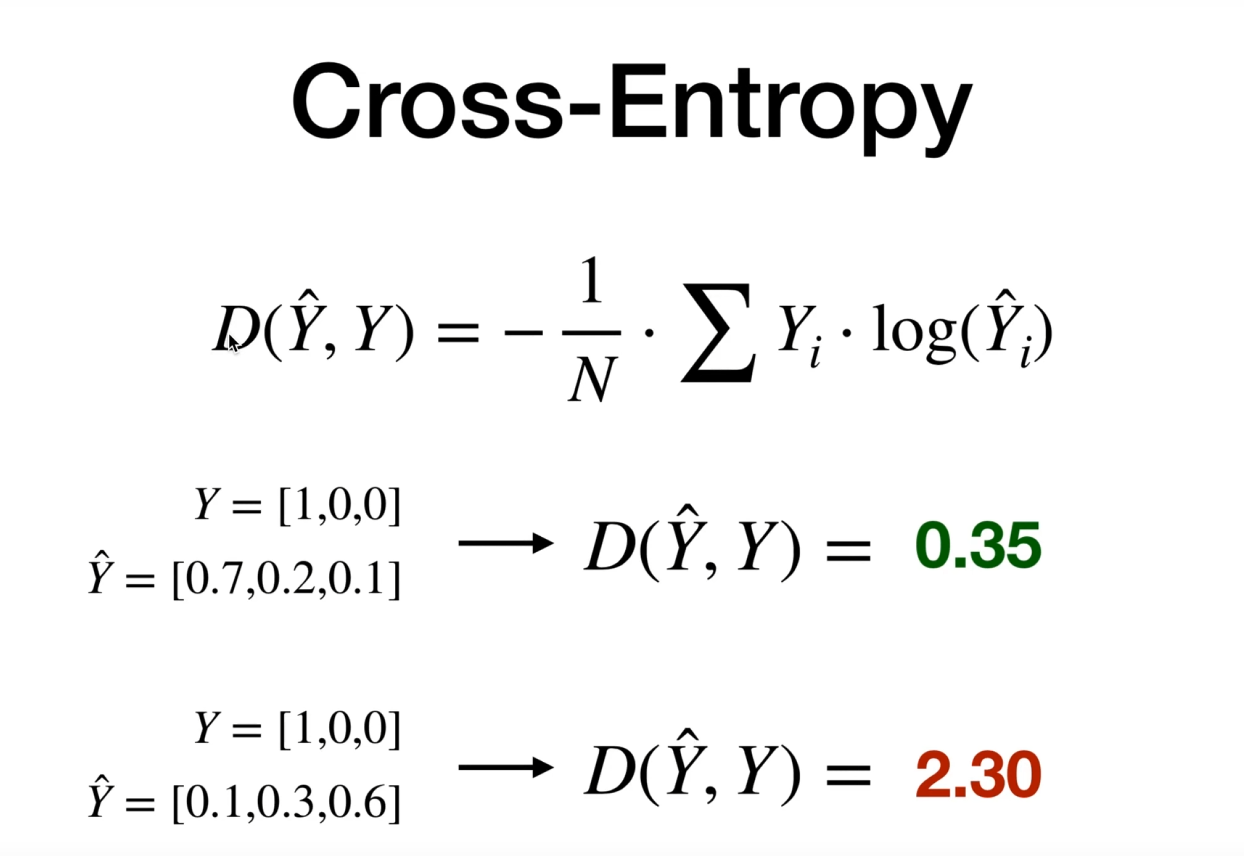

In [4]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [8]:
x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
outputs

array([0.65900114, 0.24243297, 0.09856589])

In [ ]:
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0)
outputs

tensor([0.6590, 0.2424, 0.0986])

In [ ]:
def cross_entropy(actual, predict):
    loss = -np.sum(actual * np.log(predict)) # / float(predicted.shape[0])
    return loss

In [13]:
y = np.array([1, 0, 0])

y_pred_good = np.array([0.7, 0.2, 0.1])
y_pred_bad = np.array([0.1, 0.3, 0.6])

l1 = cross_entropy(y, y_pred_good)
l2 = cross_entropy(y, y_pred_bad)

l1, l2

(np.float64(0.35667494393873245), np.float64(2.3025850929940455))

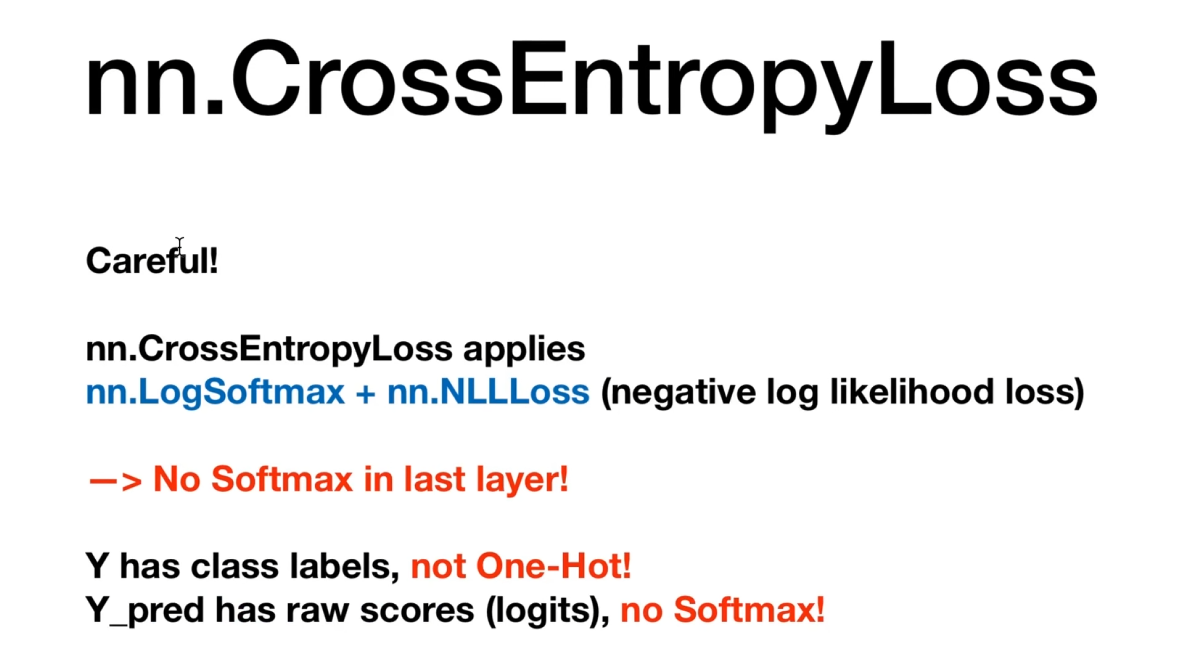

In [14]:
loss = torch.nn.CrossEntropyLoss()

In [20]:
y = torch.tensor([0])

# nsamples * nclasses = 1x3 (1 sample and 3 possible classes)
y_good = torch.tensor([[2.0, 1.0, 0.1]]) # raw values
y_bad = torch.tensor([[0.5, 2.0, 0.3]])
y_bad2 = torch.tensor([[0.5, 1.2, 3.3]])

l1 = loss(y_good, y)
l2 = loss(y_bad, y)
l3 = loss(y_bad2, y)

l1.item(), l2.item(), l3.item()

(0.4170299470424652, 1.840616226196289, 2.9682788848876953)

In [25]:
_, preds1 = torch.max(y_good, 1)
_, preds2 = torch.max(y_bad, 1)
_, preds3 = torch.max(y_bad2, 1)

preds1, preds2, preds3

(tensor([0]), tensor([1]), tensor([2]))

In [27]:
# 3 possible classes

y = torch.tensor([2, 0, 1])

# nsamples * nclasses = 3x3 (3 sample and 3 possible classes)
y_good = torch.tensor([[1.8, 1.0, 2.1], [2.0, 1.0, 0.1], [2.2, 3.0, 0.1]]) # raw values
y_bad = torch.tensor([[2.1, 1.0, 0.1], [0.1, 1.0, 2.1], [0.1, 3.0, 0.1]])
# y_bad2 = torch.tensor([[0.5, 1.2, 3.3]])

l1 = loss(y_good, y)
l2 = loss(y_bad, y)
# l3 = loss(y_bad2, y)


_, preds1 = torch.max(y_good, 1)
_, preds2 = torch.max(y_bad, 1)

l1.item(), l2.item(), preds1, preds2#, l3.item()

(0.5182405710220337, 1.6241613626480103, tensor([2, 0, 1]), tensor([0, 2, 1]))

In [ ]:
_, preds1 = torch.max(y_good, 1)
_, preds2 = torch.max(y_bad, 1)

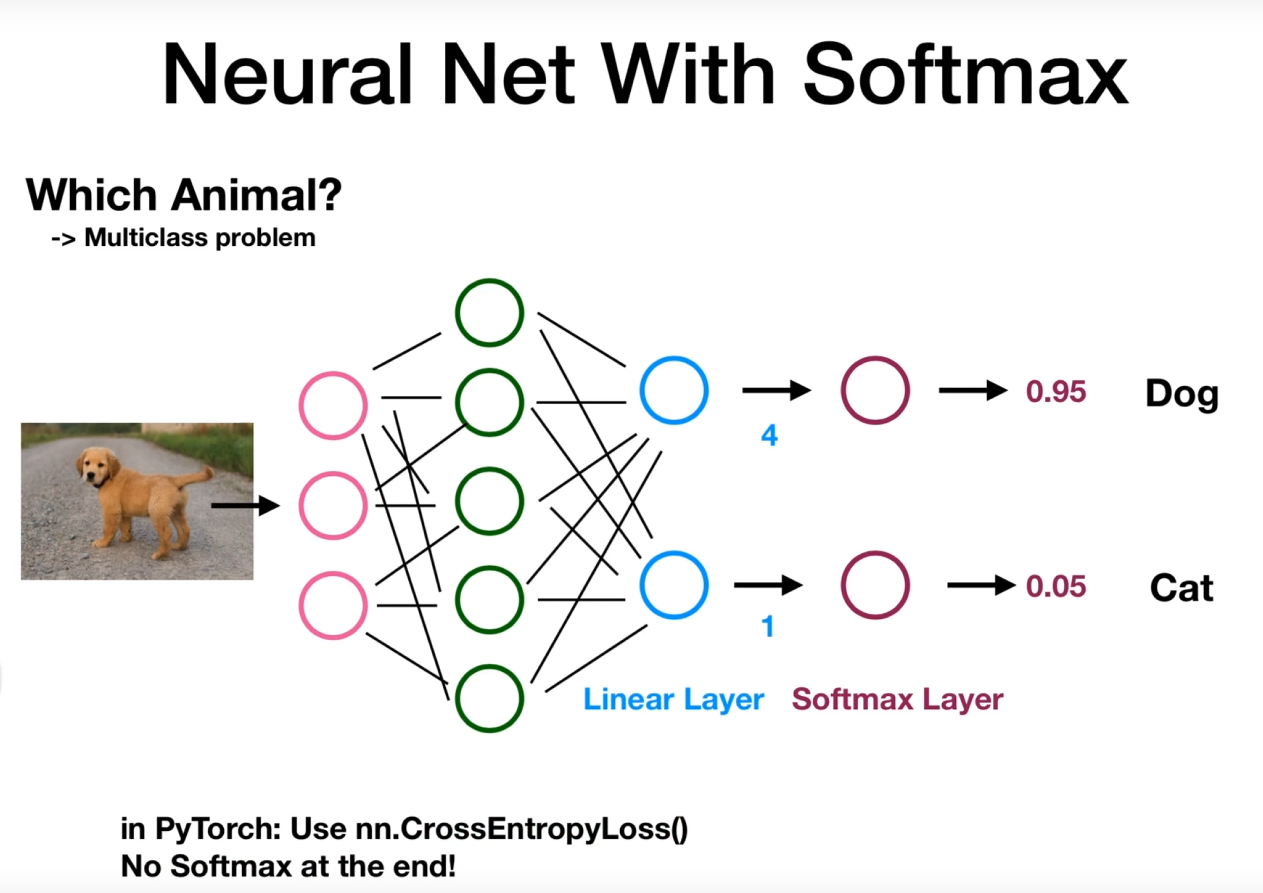

In [28]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes, *args, **kwargs):
        super(NeuralNet, self).__init__(*args, **kwargs)
        
        self.linear1 = nn.Linear(input_size, hidden_size, num_classes)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        # no softmax at the end
        
        return out

In [ ]:
model = NeuralNet(input_size=28*28, hidden_size=5, num_classes=3)
critirion =nn.CrossEntropyLoss()  # applies CrossEntropy

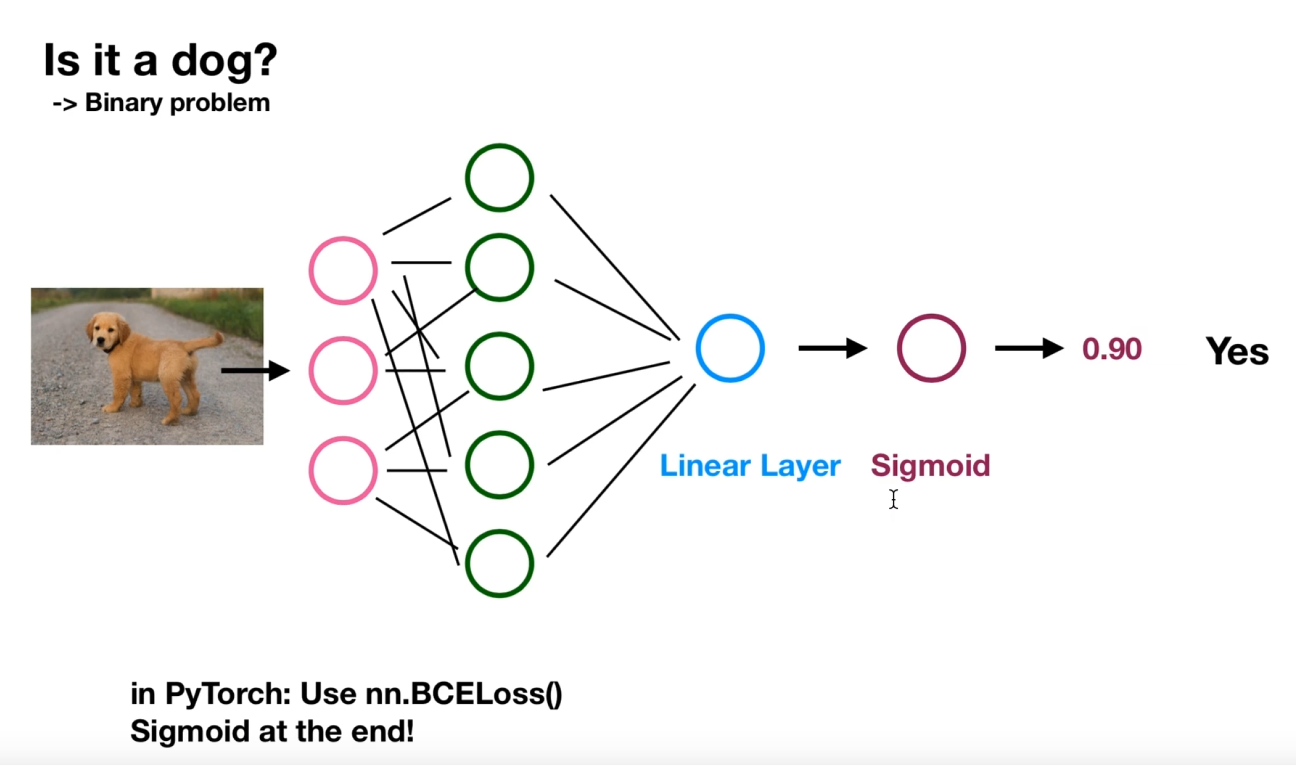

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet, self).__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        # sigmoid at the end
        out = torch.sigmoid(out)
        
        return out

In [ ]:
model = NeuralNet(input_size=28*28, hidden_size=5)
critirion = nn.BCELoss()  # applies BinaryCrossEntropy

# Activation Funcions

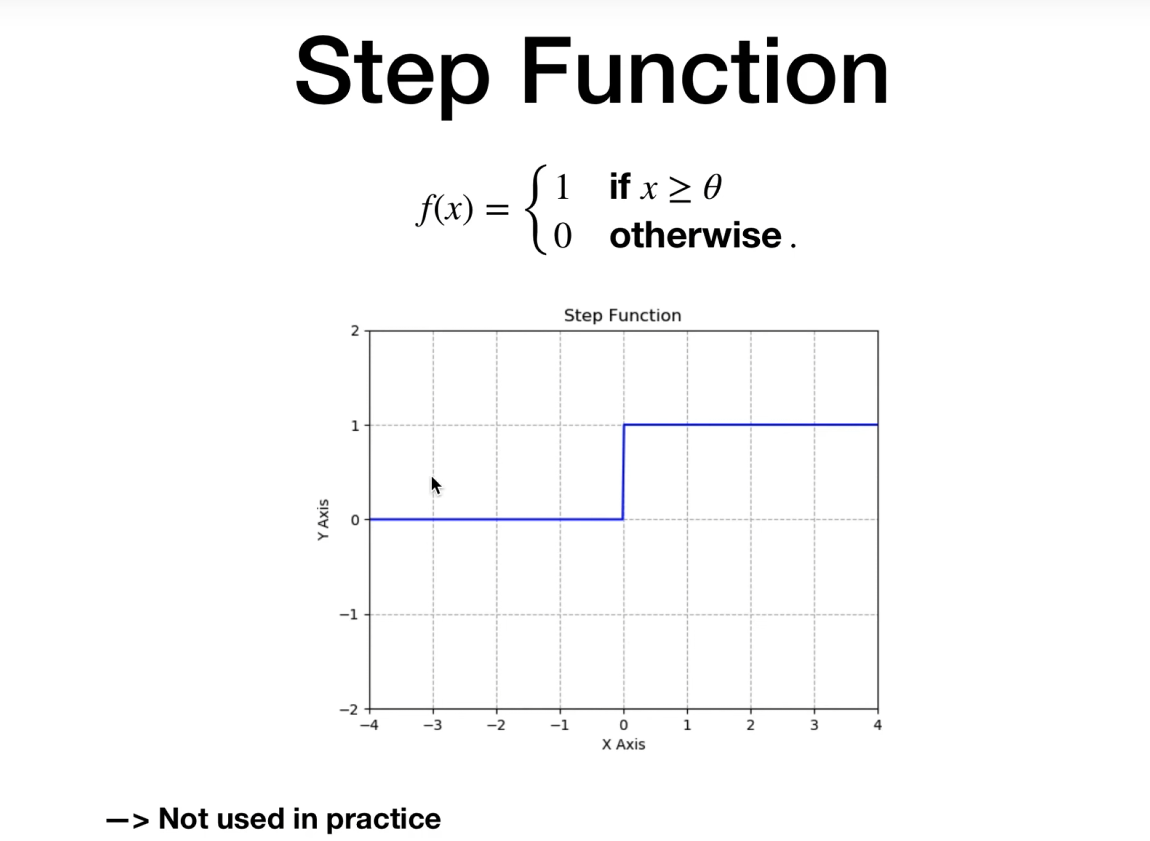

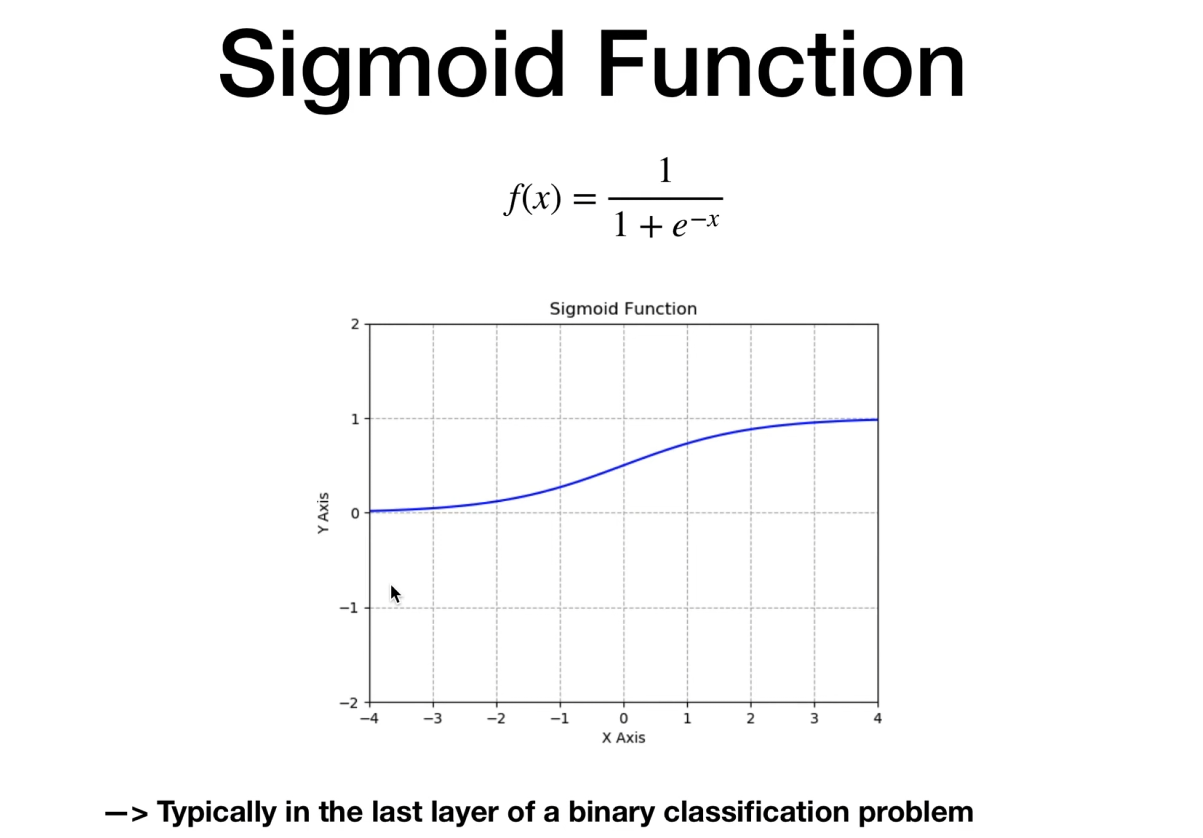

Scaled sigmoid function and also a little bit shifted

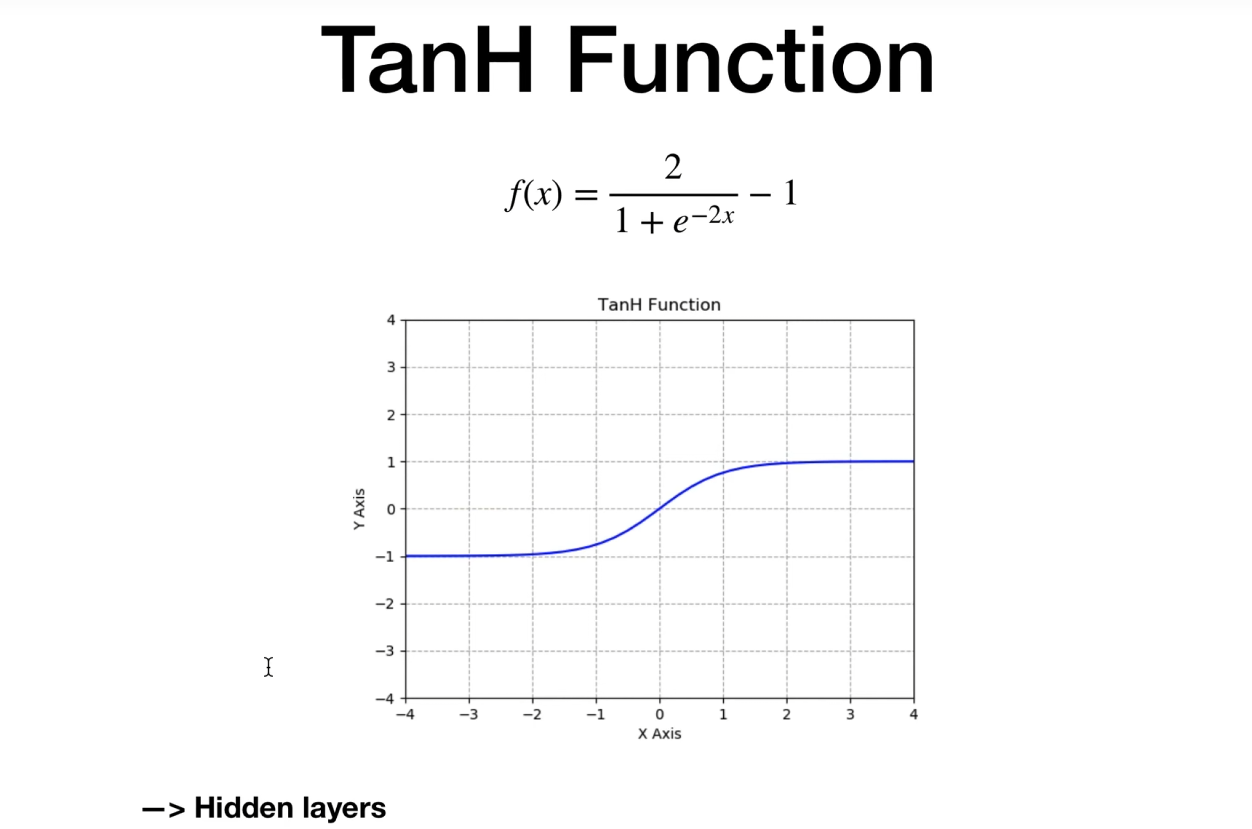

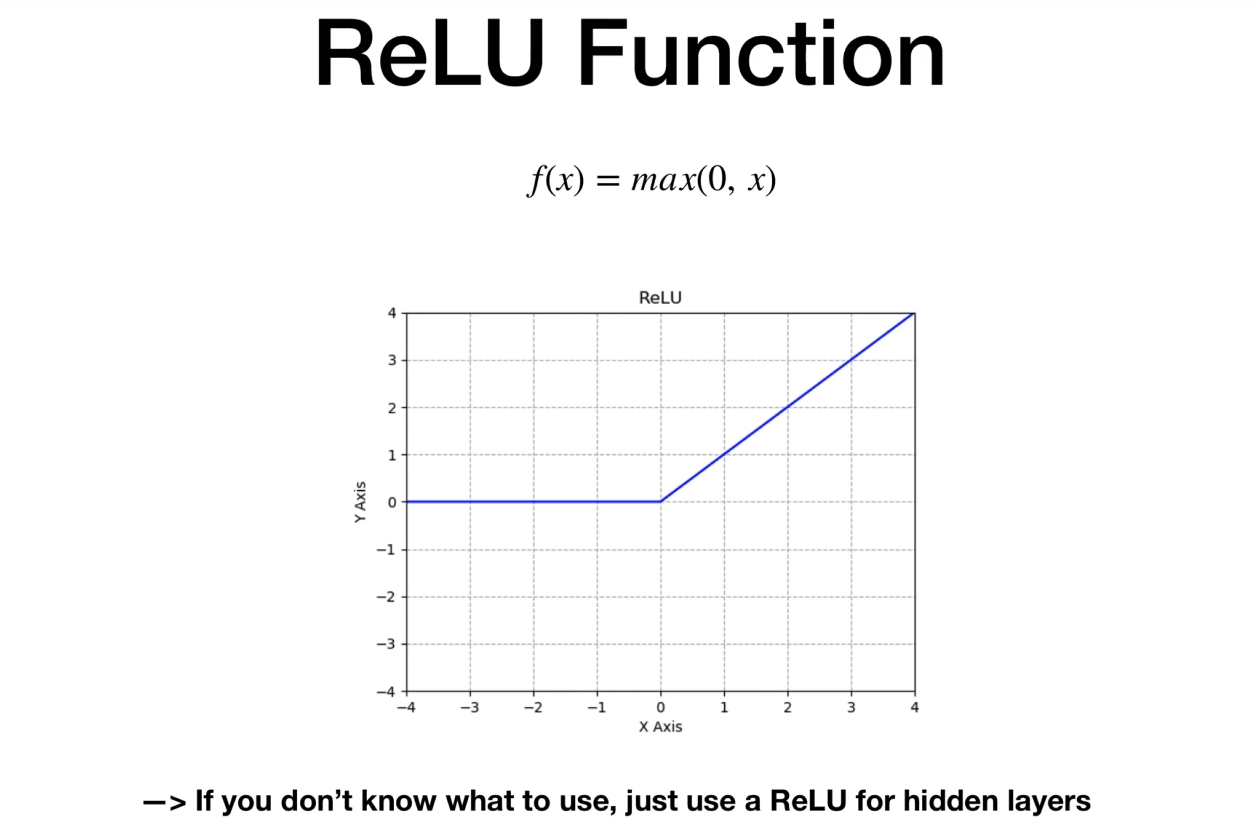

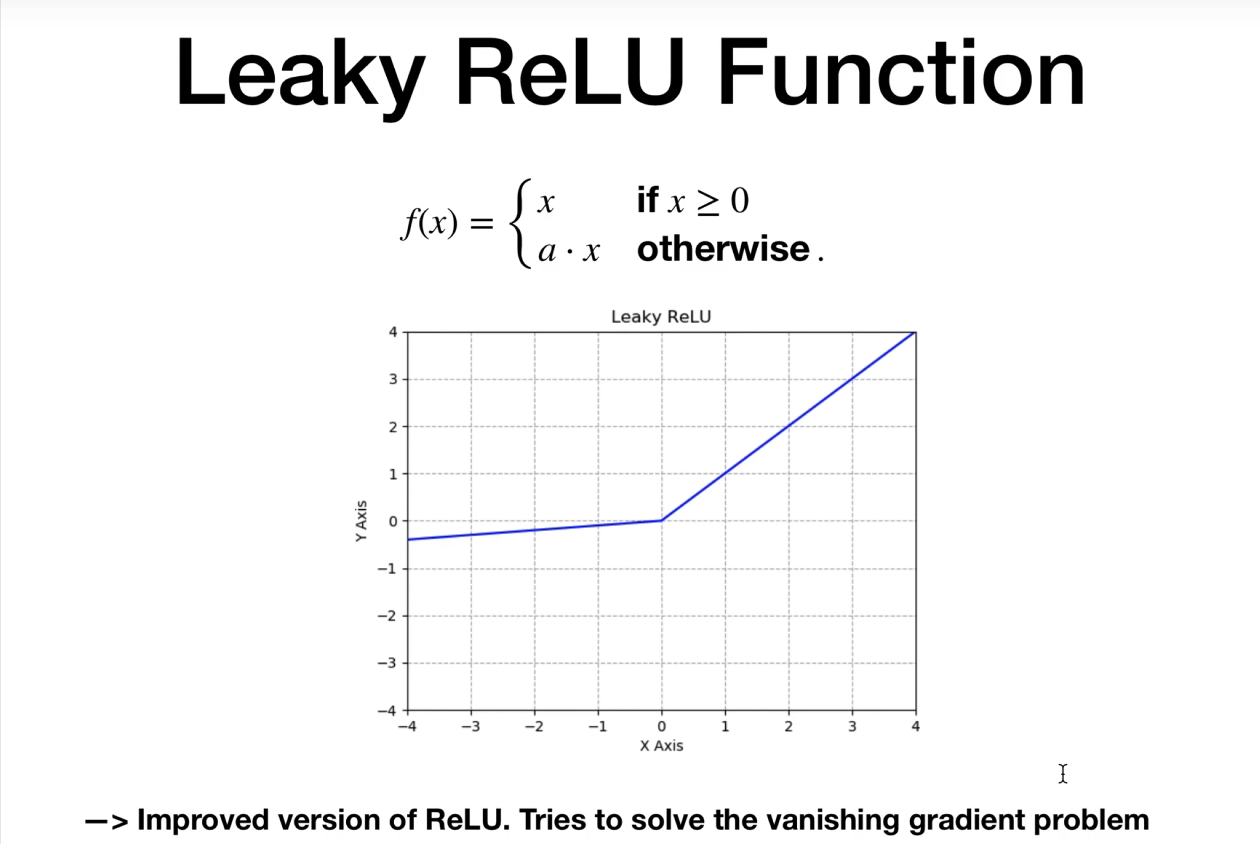

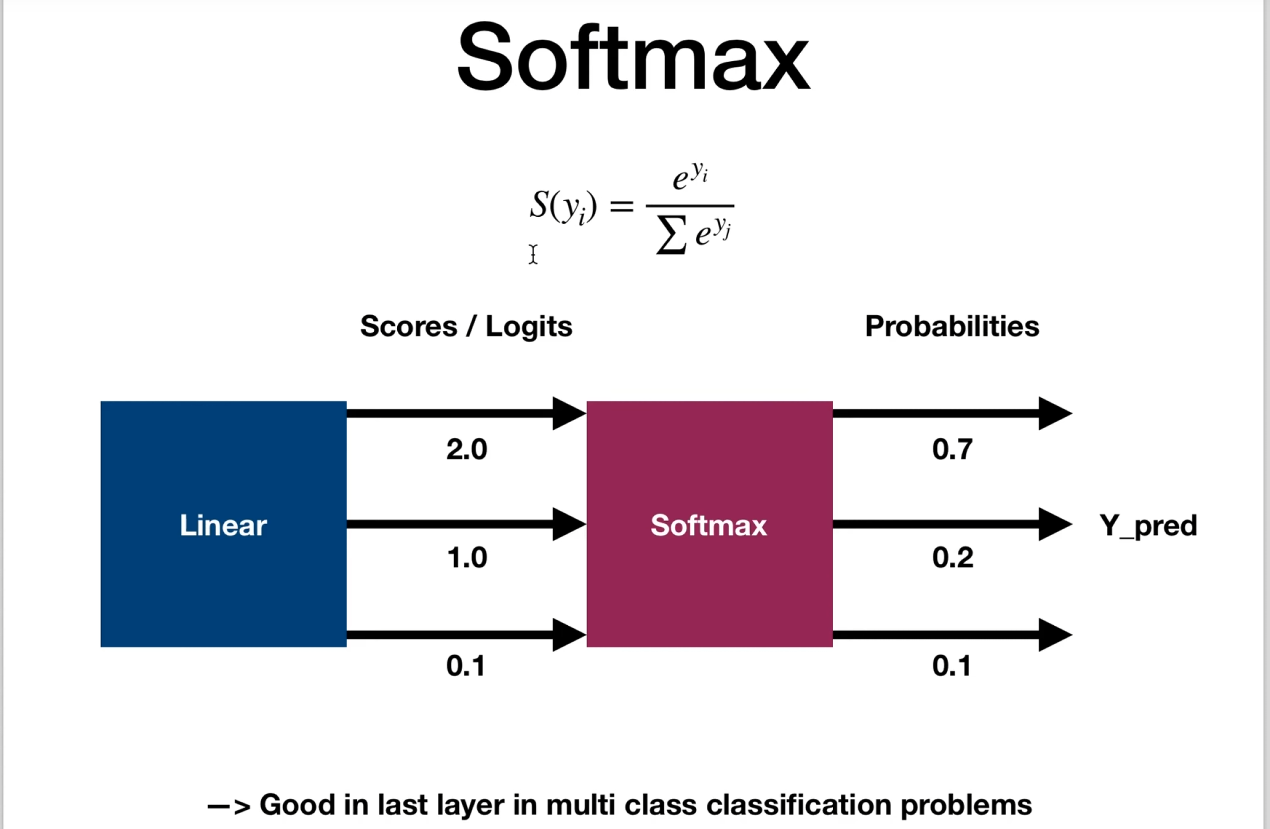

In [ ]:
# option 1 (create nn models)

# nn.Sigmoid()
# nn.Softmax()
# nn.Tanh()
# nn.LeakyReLU()


class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        # sigmoid at the end
        out = self.sigmoid(out)
        
        return out

In [ ]:
# option 2 use activation functions directly in forward pass

# torch.sigmoid()
# torch.softmax()
# ... sometimes activation functions can't be available in pytorch api, 
# but it can be found in ..........<torch.nn.functional>..........

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(x))
        
        return out

# First Neural Network implementation. Feed-Forward NeuralNetwork


* MNIST
* Data Loader, Transformation
* Multilayer Neural Net, activation function
* Loss and Optimizer
* Training Loop (batch training)
* Model evaluation
* GPU support

## Import libraries; device setting; init hyperparams

In [4]:
# import torch
# import torch.nn as nn
# import torchvision
# import torchvision.transforms as transforms

# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [5]:
# hyperparameters

input_size = 784 # 28x28 image size
hidden_size = 100
num_classes = 10 # digits from 0 to 9
num_epochs = 2
batch_size = 100
learning_rate = 0.001

## Create a DataLoader and preparing data

In [6]:
# MNIST

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform.ToTensor(), download=True) # download=True, if not downloaded
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform.ToTensor())

In [7]:
# Data Loading

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [19]:
examples_iter = iter(train_loader)
example_data, example_targets = next(examples_iter)
example_data.shape, example_targets.shape 

# samples.shape ---> (torch.Size([100, 1, 28, 28]); 100 --> batch_size, 1 --> channel, 28x28 --> actual image array
# torch.Size([100])) ---> labels

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

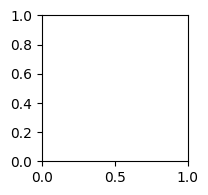

In [ ]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(example_data[i, 0], cmap='gray')
plt.show()

## Creating a nn class

In [30]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes): # output size is amount of classes
        super(NeuralNet, self).__init__()
        
        # layers
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out

In [31]:
# input_size = 784 # 28x28 image size
# hidden_size = 100
# num_classes = 10 # digits from 0 to 9

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

## Loss and Optimizer

In [32]:
critirion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)    # learning_rate = 0.001

In [33]:
train_loader.batch_size

100

## Writing a training loop

In [34]:
train_loader.batch_size, len(train_loader)

(100, 600)

In [36]:
n_total_steps = len(train_loader)

# num_epochs = 2
# batch_size = 100

# for tensorboard ploting
running_loss = .0
running_correct = 0

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 100, 1, 28, 28
        # 100, 784
        
        
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward pass
        outputs = model(images)
        loss = critirion(outputs, labels)
        
        # backward pass
        optimizer.zero_grad()
        loss.backward()
        
        # update parameters
        optimizer.step()
        
        # for tensorboard plotting
        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        running_correct += (predicted == labels).sum().item()
        
        if (i+1) % 100 == 0:
            print(f'epoch: {epoch+1}/{num_epochs}, step: {i}/{n_total_steps}, loss: {loss.item():.4f}')
            writer.add_scalar('training loss', running_loss / 100, epoch * n_total_steps + i)
            writer.add_scalar('Accuracy', running_correct / 100, epoch * n_total_steps + i)
            running_loss = .0
            running_correct = 0
        
        

epoch: 1/2, step: 99/600, loss: 0.4544
epoch: 1/2, step: 199/600, loss: 0.3370
epoch: 1/2, step: 299/600, loss: 0.3091
epoch: 1/2, step: 399/600, loss: 0.3719
epoch: 1/2, step: 499/600, loss: 0.2804
epoch: 1/2, step: 599/600, loss: 0.2487
epoch: 2/2, step: 99/600, loss: 0.2075
epoch: 2/2, step: 199/600, loss: 0.1033
epoch: 2/2, step: 299/600, loss: 0.2076
epoch: 2/2, step: 399/600, loss: 0.1396
epoch: 2/2, step: 499/600, loss: 0.2104
epoch: 2/2, step: 599/600, loss: 0.1707


## Evaluating the model

In [ ]:
with torch.no_grad():
    n_samples = 0
    n_correct = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Print where is the variable on gpu or cpu
        # print("model:", next(model.parameters()).device)
        # print("outputs:", outputs.device)
        # print("predictions:", predictions.device)
        # print("labels:", labels.device)
        
        outputs = model(images)
        _, predictions = torch.max(outputs, 1)
        
        n_samples += labels.shape[0]    # num of samples in a current batch
        n_correct += (predictions == labels).sum().item()


In [17]:
acc = 100.0 * n_correct / n_samples
acc

95.31

## TensorBoard

In [18]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter("runs/mnist")

In [ ]:
# Add image

img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)
writer.close()

In [ ]:
# Add graph

example_data = example_data.to(device)
writer.add_graph(model, example_data.reshape(-1, 28*28))
writer.close()